<a href="https://colab.research.google.com/github/Celeste2405/ENSAI-2A-Java-TP/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PROJET DE SCORING (3A - ENSAI)**

*Par Mariane ALAPINI & Céleste NENEHIDINI*

Fichier de pré-traitement de la base de données

In [1]:
# Importation des bibliothèques Python nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Pour donner accès à mon drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importation des données

In [5]:
# On importe le fichier csv précédemment créé
path = "/content/drive/MyDrive/PROJET SCORING/data/data_seed1.csv"
data = pd.read_csv(path, sep='\t')
print(data.head())

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/PROJET SCORING/data/data_seed1.csv'

In [9]:
import os

try:


    print("Files in the directory:")
    for file in files:
        print(file)
except FileNotFoundError:
    print("The directory was not found. Please check the path.")

    import os



The directory was not found. Please check the path.


In [17]:
os.listdir('/content/drive/.shortcut-targets-by-id')


[]

Quelques analyses préliminaires : valeurs manquantes, format des données, etc

In [ ]:
# Vérifions s'il y a des valeurs manquantes dans la base
# Nombre de valeurs manquantes par variables
data.isna().sum()

,0
DATDELHIS_Mm0,0
NUMTECPRS,0
SLDCRDMMS_SUM_Mm1,0
ENGAGEMENT_SUM_Mm1,0
Top_PRET_CONSO_Mm1,0
...,...
CRTAD_AG_NBJDE_BC,0
TOPCPTLITIG,0
SOMME_ENCOURS,0
cible,0


In [ ]:
# Voir l'ensemble des types des variables de la base
data.dtypes

,0
DATDELHIS_Mm0,object
NUMTECPRS,object
SLDCRDMMS_SUM_Mm1,object
ENGAGEMENT_SUM_Mm1,object
Top_PRET_CONSO_Mm1,object
...,...
CRTAD_AG_NBJDE_BC,object
TOPCPTLITIG,object
SOMME_ENCOURS,object
cible,int64


La fonction ne détecte aucune valeur manquante, car des erreurs ont été sciemment glissées dans la base par le professeur. Des espaces, des points d'interrogation pour les NA et les décimales en virgule au lieu de points. Il faudra corriger tout ça.

In [ ]:
# Traitement des espaces et des décimales et des valeurs manquantes (?)
data = data.replace("?", pd.NA)
data = data.replace(r"\s+", "", regex=True)
data = data.replace(",", ".", regex=True)

In [ ]:
data.head()
# Le visuel des données est bien meilleur
# On a 130 variables en tout, ce nombre tient compte des modalités des variables catégorielles

,DATDELHIS_Mm0,NUMTECPRS,SLDCRDMMS_SUM_Mm1,ENGAGEMENT_SUM_Mm1,Top_PRET_CONSO_Mm1,NBR_PRET_CONSO_Mm1,SLDCRDMMS_SUM_Mm2,ENGAGEMENT_SUM_Mm2,Top_PRET_CONSO_Mm2,NBR_PRET_CONSO_Mm2,...,CRTAD_AG_SOLDE_T1,CRTAD_AG_SOLDE_T2,ENCOURS_PAR,CRTAD_AG_NBJDE_BB,CRTAD_AG_NBJDE_BA,CRTAD_AG_NBJDE_BC,TOPCPTLITIG,SOMME_ENCOURS,cible,rnd_1_20
0,202409,1099619549,183448.00,500.00,0.00,0.00,115698.00,500.00,0.00,0.00,...,408666.00,334000.00,5768333.00,0.00,0.00,0.00,0,5768333.00,0,1
1,202409,4601803359,130534.00,636290.50,0.00,0.00,1834431.00,638023.50,0.00,0.00,...,1911833.00,1605666.00,3354000.00,0.00,0.00,0.00,0,3354000.00,0,1
2,202403,4099666066,110594.00,2200.00,0.00,0.00,117825.00,2211.70,0.00,0.00,...,182833.00,180000.00,8001067.00,0.00,0.00,0.00,0,8001067.00,0,1
3,202402,8367607781,5659.00,200.00,0.00,0.00,2283.00,200.00,0.00,0.00,...,25666.00,0.00,29000.00,40.00,40.00,0.00,0,29000.00,0,1
4,202402,8099573948,929771.00,400.00,0.00,0.00,933597.00,400.00,0.00,0.00,...,2831666.00,2725000.00,7489722.00,0.00,0.00,0.00,0,7489722.00,0,1


In [ ]:
data.isna().sum()
# les valeurs manquantes apparaissent clairement maintenant

,0
DATDELHIS_Mm0,0
NUMTECPRS,0
SLDCRDMMS_SUM_Mm1,93
ENGAGEMENT_SUM_Mm1,93
Top_PRET_CONSO_Mm1,93
...,...
CRTAD_AG_NBJDE_BC,38
TOPCPTLITIG,38
SOMME_ENCOURS,38
cible,0


Le prof a suggéré d'enlever toutes les modalités de la variable : MNTSLDCTAJJR_MAX

In [ ]:
# Enlever les variables à ne pas utiliser
data = data.drop(columns=["MNTSLDCTAJJR_MAX_Mm0", "MNTSLDCTAJJR_MAX_Mm1", "MNTSLDCTAJJR_MAX_Mm2"])
data.shape

(54848, 127)

In [ ]:
data.head()

,DATDELHIS_Mm0,NUMTECPRS,SLDCRDMMS_SUM_Mm1,ENGAGEMENT_SUM_Mm1,Top_PRET_CONSO_Mm1,NBR_PRET_CONSO_Mm1,SLDCRDMMS_SUM_Mm2,ENGAGEMENT_SUM_Mm2,Top_PRET_CONSO_Mm2,NBR_PRET_CONSO_Mm2,...,CRTAD_AG_SOLDE_T2,ENCOURS_PAR,CRTAD_AG_NBJDE_BB,CRTAD_AG_NBJDE_BA,CRTAD_AG_NBJDE_BC,TOPCPTLITIG,SOMME_ENCOURS,cible,rnd_1_20,DATDELHIS_Mm0_ym
0,2024-09-01,1099619549,183448.0,500.0,0.0,0.0,115698.0,500.0,0.0,0.0,...,334000.0,5768333.0,0.0,0.0,0.0,0.0,5768333.0,0,1,2024-09
1,2024-09-01,4601803359,130534.0,636290.5,0.0,0.0,1834431.0,638023.5,0.0,0.0,...,1605666.0,3354000.0,0.0,0.0,0.0,0.0,3354000.0,0,1,2024-09
2,2024-03-01,4099666066,110594.0,2200.0,0.0,0.0,117825.0,2211.7,0.0,0.0,...,180000.0,8001067.0,0.0,0.0,0.0,0.0,8001067.0,0,1,2024-03
3,2024-02-01,8367607781,5659.0,200.0,0.0,0.0,2283.0,200.0,0.0,0.0,...,0.0,29000.0,40.0,40.0,0.0,0.0,29000.0,0,1,2024-02
4,2024-02-01,8099573948,929771.0,400.0,0.0,0.0,933597.0,400.0,0.0,0.0,...,2725000.0,7489722.0,0.0,0.0,0.0,0.0,7489722.0,0,1,2024-02


On traite à présent le type des variables pour qu'ils soient corrects avant l'analyse

In [ ]:
# Identification des colonnes de type "object"
object_columns = data.select_dtypes(include=['object']).columns
print("Colonnes de type 'object' :", list(object_columns))

Colonnes de type 'object' : ['DATDELHIS_Mm0', 'NUMTECPRS', 'SLDCRDMMS_SUM_Mm1', 'ENGAGEMENT_SUM_Mm1', 'Top_PRET_CONSO_Mm1', 'NBR_PRET_CONSO_Mm1', 'SLDCRDMMS_SUM_Mm2', 'ENGAGEMENT_SUM_Mm2', 'Top_PRET_CONSO_Mm2', 'NBR_PRET_CONSO_Mm2', 'SLDCRDMMS_SUM_Mm3', 'Top_PRET_CONSO_Mm3', 'NBR_PRET_CONSO_Mm3', 'ENGAGEMENT_SUM_Mm3', 'SLDCRDMMS_SUM_Mm4', 'ENGAGEMENT_SUM_Mm4', 'Top_PRET_CONSO_Mm4', 'NBR_PRET_CONSO_Mm4', 'SLDCRDMMS_SUM_Mm5', 'ENGAGEMENT_SUM_Mm5', 'Top_PRET_CONSO_Mm5', 'NBR_PRET_CONSO_Mm5', 'SLDCRDMMS_SUM_Mm6', 'ENGAGEMENT_SUM_Mm6', 'Top_PRET_CONSO_Mm6', 'NBR_PRET_CONSO_Mm6', 'SUM_MENSUALITE_IMO', 'MONTANT_SUM', 'SLDDBTMMS_SUM', 'SLDDBTMMS_MOY', 'SLDCRDMMS_SUM', 'SLDCRDMMS_MOY', 'BILAN_SUM', 'HORSBILAN_SUM', 'ENGAGEMENT_SUM', 'NBRJJRDVTAUTCSC_STK', 'DECOUVERT_MOY_SUM', 'DECOUVERT_MOY_MEAN', 'IMPAYE_SUM', 'DEPASSEMENT_SUM', 'MAX_NBRJJR_SS_Mm1_Mm0', 'MAX_NBRJJR_SS_Mm2_Mm0', 'MAX_NBRJJR_SS_Mm3_Mm0', 'MAX_CODNIV_DB_Mm1_Mm0', 'MAX_CODNIV_DB_Mm2_Mm0', 'MAX_CODNIV_DB_Mm3_Mm0', 'NBRJJR_SS', 'ANC

In [ ]:
for col in object_columns:
    print(f"{col}: valeurs uniques -> {data[col].unique()[:15]}")

DATDELHIS_Mm0: valeurs uniques -> ['202409' '202403' '202402' '202412' '202406' '202405' '202401' '202410'
 '202404' '202411' '202408' '202407']
NUMTECPRS: valeurs uniques -> ['1099619549' '4601803359' '4099666066' '8367607781' '8099573948'
 '7099724292' '5099610752' '7191941923' '8147136139' '1100829835'
 '1599467980' '6186320621' '2023282839' '8599695516' '1599586306']
SLDCRDMMS_SUM_Mm1: valeurs uniques -> ['183448.00' '130534.00' '110594.00' '5659.00' '929771.00' '537483.00'
 '30299.00' '1399.00' '28615.00' '888.00' '26211.00' '5655.00' '26692.00'
 '85198.00' '78313.00']
ENGAGEMENT_SUM_Mm1: valeurs uniques -> ['500.00' '636290.50' '2200.00' '200.00' '400.00' '800.00' '3731.87'
 '6449.94' '194149.90' '8765.63' '4000.00' '0.00' '319980.06' '749.80'
 '1079.24']
Top_PRET_CONSO_Mm1: valeurs uniques -> ['0.00' '1.00' <NA>]
NBR_PRET_CONSO_Mm1: valeurs uniques -> ['0.00' '1.00' '2.00' '4.00' <NA> '3.00' '5.00' '6.00' '8.00']
SLDCRDMMS_SUM_Mm2: valeurs uniques -> ['115698.00' '1834431.00' '1

In [ ]:
# Convertir les colonnes qui ont des valeurs numériques sous forme de texte
for col in object_columns:
  if data[col].dropna().str.replace('.', '', 1).str.isnumeric().all():
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [ ]:
# Vérification
print(data.dtypes.value_counts())

float64    99
object     17
int64      11
Name: count, dtype: int64


In [ ]:
data.dtypes

,0
DATDELHIS_Mm0,int64
NUMTECPRS,int64
SLDCRDMMS_SUM_Mm1,float64
ENGAGEMENT_SUM_Mm1,float64
Top_PRET_CONSO_Mm1,float64
...,...
CRTAD_AG_NBJDE_BC,float64
TOPCPTLITIG,float64
SOMME_ENCOURS,float64
cible,int64


In [ ]:
# Identification supplémentaire des colonnes restantes de type "object"
object_columns = data.select_dtypes(include=['object']).columns
print("Colonnes de type 'object' :", list(object_columns))
# On voit que ce sont des colonnes avec des valeurs négatives

Colonnes de type 'object' : ['SLDDBTMMS_SUM', 'SLDDBTMMS_MOY', 'MNTVIRPEREMI', 'MNTVIRPONEMI', 'MNTECSAVO', 'MNTCHQEMI', 'MNTTOTMVTAFF', 'MNTPLV', 'MNTOPECAR', 'MNTECRDBT', 'MNTECSCPTDPT', 'RATIO_SLDCRDMMS_MOY_SLDBTSUM', 'part_FDC_prio', 'RATIO_MNTVIRPEREMI_NBVIRPEREMI', 'CRTAD_AG_SOLDE_T', 'CRTAD_AG_SOLDE_T1', 'CRTAD_AG_SOLDE_T2']


In [ ]:
for col in object_columns:
    print(f"{col}: valeurs uniques -> {data[col].unique()[:15]}")

SLDDBTMMS_SUM: valeurs uniques -> ['0.00' '-736.00' '-18293.00' '-20917.00' '-151.00' '-7056.00' '-5427.00'
 '-10131.00' '-13552.00' '-90673.00' '-141254.00' '-747.00' '-16942.00'
 '-340.00' '-121.00']
SLDDBTMMS_MOY: valeurs uniques -> ['0.00' '-736.00' '-6097.67' '-10458.50' '-151.00' '-7056.00' '-1356.75'
 '-5065.50' '-6776.00' '-45336.50' '-17656.75' '-747.00' '-5647.33'
 '-340.00' '-121.00']
MNTVIRPEREMI: valeurs uniques -> ['0.00' '-400.00' '-960.00' '-22.50' '-153.00' '-140.00' '-100.00'
 '-1735.20' '-57.50' '-600.00' '-25.00' '-900.00' '-1330.00' '-10.00'
 '-38.50']
MNTVIRPONEMI: valeurs uniques -> ['-750.00' '-909.02' '-150.00' '-514.00' '0.00' '-470.00' '-32738.83'
 '-1920.00' '-3471.22' '-2790.00' '-2435.04' '-799.99' '-252.00' '-200.00'
 '-1711.00']
MNTECSAVO: valeurs uniques -> ['62863.81' '37825.22' '83627.02' '162.58' '105804.49' '16799.59'
 '53578.01' '-528.73' '19341.10' '30.88' '49921.96' '76718.02' '9152.89'
 '14237.25' '27182.49']
MNTCHQEMI: valeurs uniques -> ['-171

In [ ]:
for col in object_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

In [ ]:
# Vérification
print(data.dtypes.value_counts())

float64    116
int64       11
Name: count, dtype: int64


In [ ]:
# Convertir la date au format date
data['DATDELHIS_Mm0'] = pd.to_datetime(data['DATDELHIS_Mm0'], format='%Y%m', errors='coerce')

In [ ]:
# Vérification
print(data['DATDELHIS_Mm0'].dtypes)
print(data['DATDELHIS_Mm0'].head())

datetime64[ns]
0   2024-09-01
1   2024-09-01
2   2024-03-01
3   2024-02-01
4   2024-02-01
Name: DATDELHIS_Mm0, dtype: datetime64[ns]


In [ ]:
# Créer une variable de date qui ne conserve que le mois et l'année
data['DATDELHIS_Mm0_ym'] = data['DATDELHIS_Mm0'].dt.to_period('M')

In [ ]:
# Vérification
print(data['DATDELHIS_Mm0_ym'].dtypes)
print(data['DATDELHIS_Mm0_ym'].head())

period[M]
0    2024-09
1    2024-09
2    2024-03
3    2024-02
4    2024-02
Name: DATDELHIS_Mm0_ym, dtype: period[M]


In [ ]:
# Convertir la variable 'NUMTECPRS' en chaine de caractères
data['NUMTECPRS'] = data['NUMTECPRS'].astype(str)

In [ ]:
# Vérification
print(data.dtypes.value_counts())

float64           116
int64               9
datetime64[ns]      1
object              1
period[M]           1
Name: count, dtype: int64


Quelques représentations graphiques pour avoir une analyse descriptive (sur l'intégralité de la base)

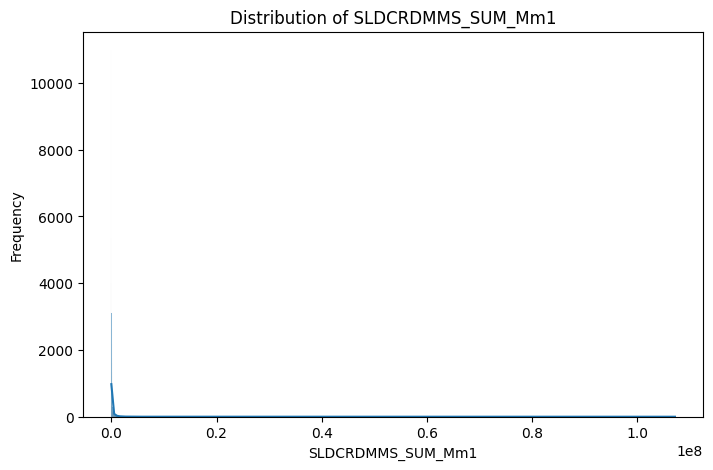

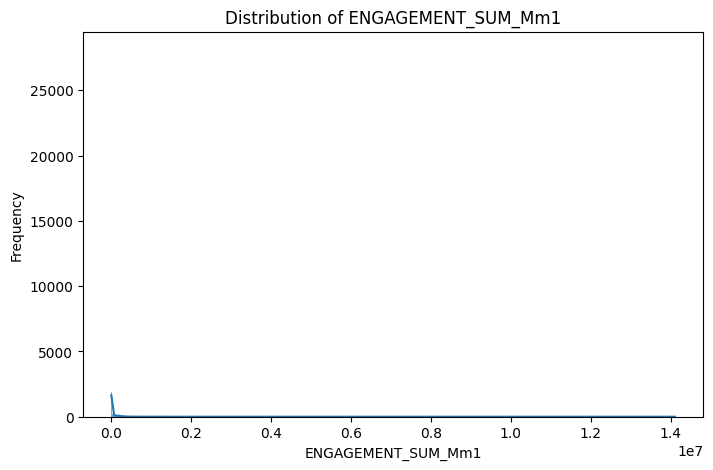

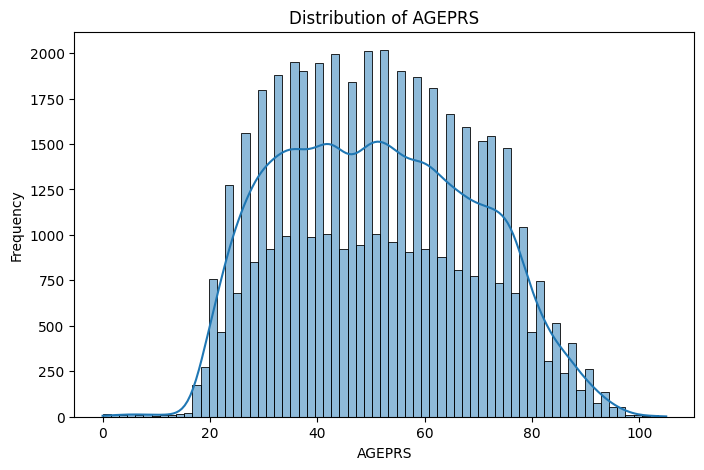

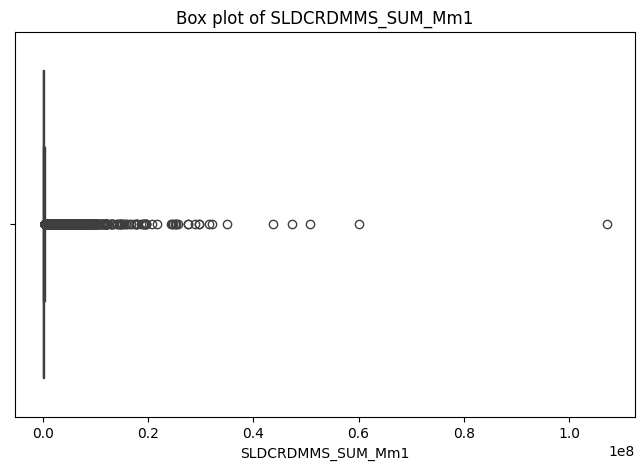

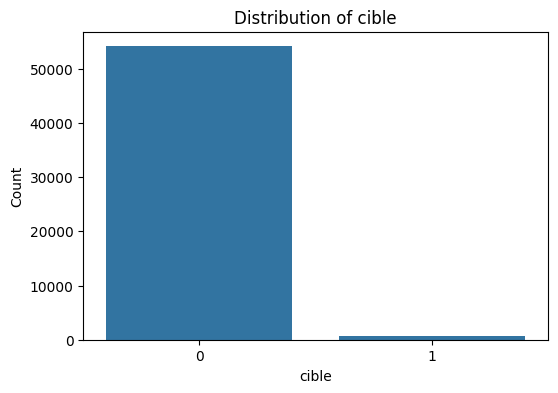

In [ ]:
# Sélections de quelques variables
selected_columns = ['SLDCRDMMS_SUM_Mm1', 'ENGAGEMENT_SUM_Mm1', 'AGEPRS', 'cible']

# Création d'un histogramme pour les variables quantitatives
for col in selected_columns[:-1]: # Exclude 'cible'
    plt.figure(figsize=(8, 5))
    sns.histplot(data[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Boxplot pour les variables quantitatives
plt.figure(figsize=(8, 5))
sns.boxplot(x=data['SLDCRDMMS_SUM_Mm1'].dropna())
plt.title('Box plot of SLDCRDMMS_SUM_Mm1')
plt.xlabel('SLDCRDMMS_SUM_Mm1')
plt.show()

# Diagramme en barres pour la variable cible
plt.figure(figsize=(6, 4))
sns.countplot(x=data['cible'].dropna())
plt.title('Distribution of cible')
plt.xlabel('cible')
plt.ylabel('Count')
plt.show()